**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 8**
Regresión Lineal

---

# **Equipo 21**
### * A01795639 - Lineth Del Carmen Guerra Camarena
### * A01795568 - Martin Jurado Pedroza
### * A01550176 - Juan Carlos Olivier Jasso
### * A00954533 -Erick Rosales Alvarez

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
DIR = "/content/drive/MyDrive/data science"
os.chdir(DIR)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
insurance_df = pd.read_csv('insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# **Parte 1**. EDA

Efectúa una exploración inicial de los datos a través de:

1a) Estadísticas descriptivas para todas las variables del dataframe.

In [5]:
#estadísticas descriptica para variables númericas
numerica = insurance_df.describe()
print("Estadística descriptiva para variables númericas:")
display(numerica)
#estadísticas descriptiva para variables categoricas
categoricas = insurance_df.describe(include='object')
print("Estadística descriptiva para varibales categoricas:")
display(categoricas)

Estadística descriptiva para variables númericas:


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Estadística descriptiva para varibales categoricas:


,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


1b) Búsqueda de valores faltantes.

In [6]:
insurance_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

1c) Histrogramas y boxplots para las variables cuantitativas y diagramas de barras con la frecuencia para las variables categóricas.

Histogramas

<ipython-input-7-2494e9340c0a>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=insurance_df[column], kde=True, palette='tab10')


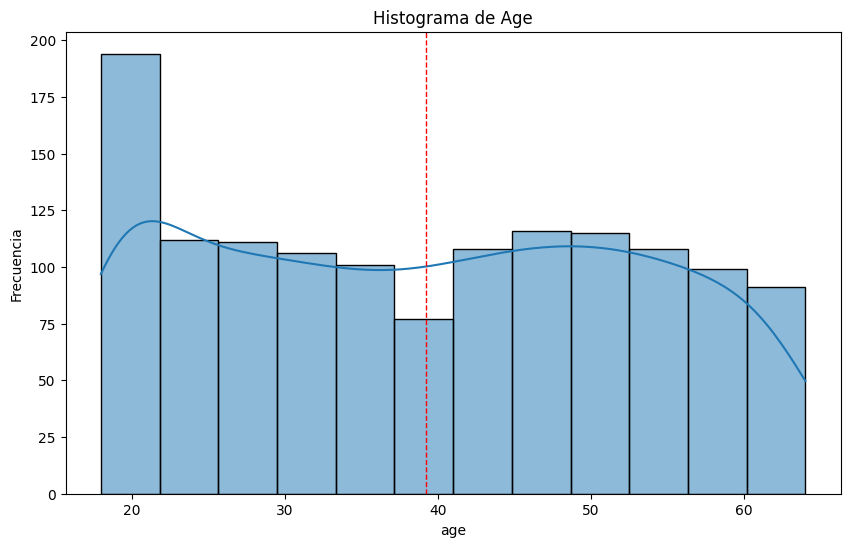

<ipython-input-7-2494e9340c0a>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=insurance_df[column], kde=True, palette='tab10')


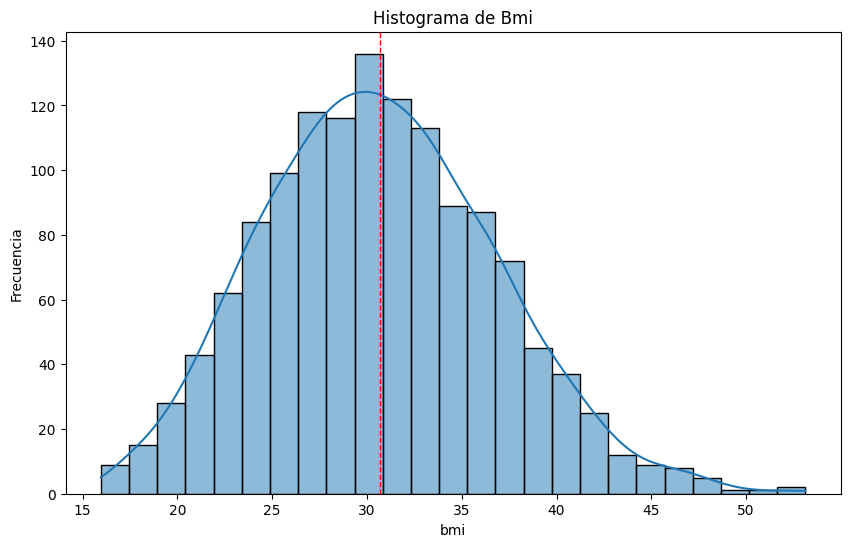

<ipython-input-7-2494e9340c0a>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=insurance_df[column], kde=True, palette='tab10')


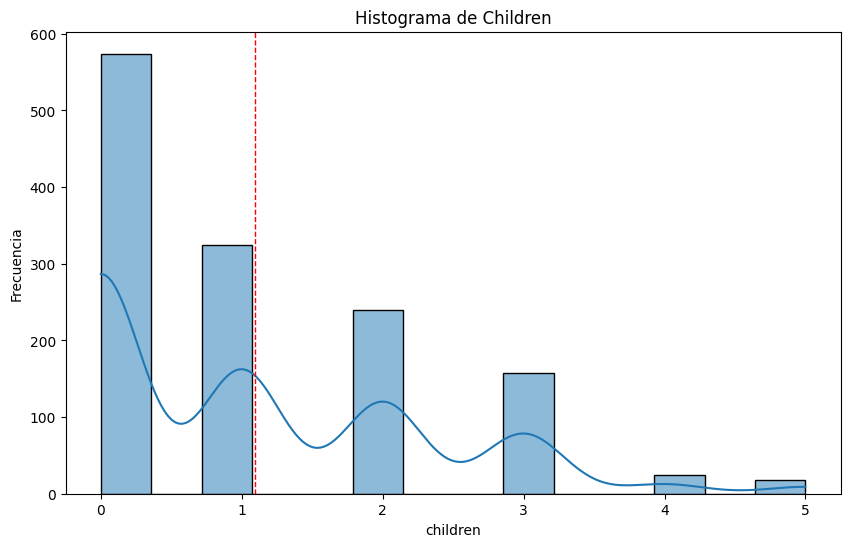

<ipython-input-7-2494e9340c0a>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=insurance_df[column], kde=True, palette='tab10')


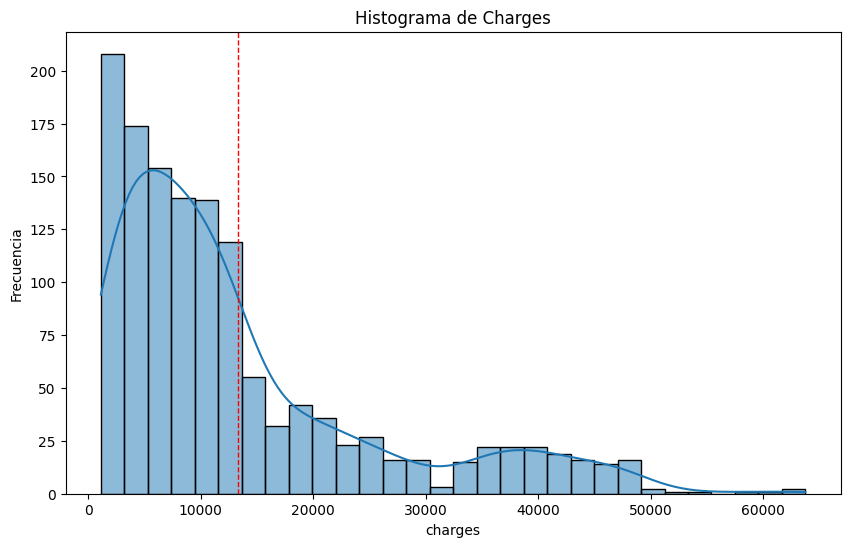

In [7]:
columns = insurance_df.describe()

for column in columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(x=insurance_df[column], kde=True, palette='tab10')
    plt.axvline(insurance_df[column].mean(), color='r', linestyle='dashed', linewidth=1)
    plt.title(f'Histograma de {column.capitalize()}')
    plt.xlabel(column)
    plt.ylabel("Frecuencia")
    plt.show()

Boxplot

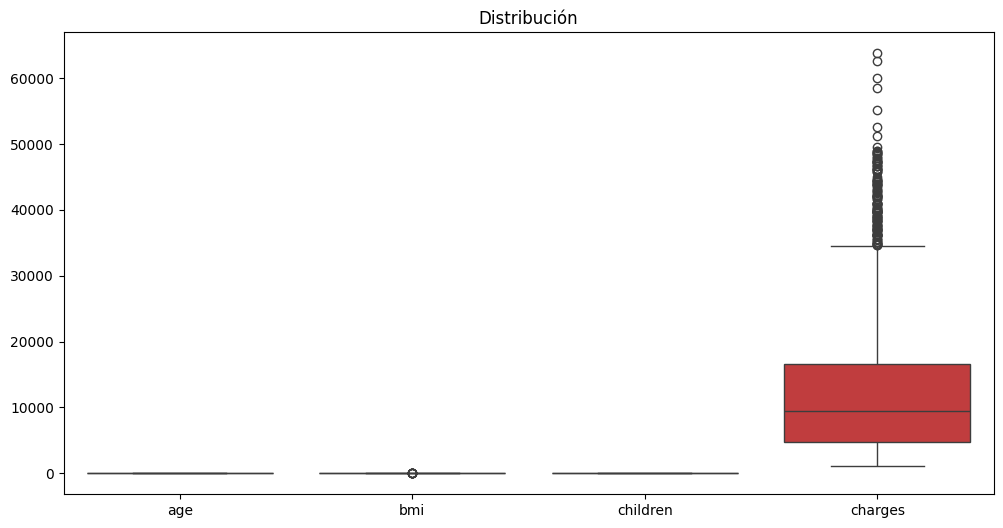

In [8]:
#datos de entrada
variable_numerica = insurance_df.select_dtypes(include=['int64', 'float64'])
#Gráfico Boxplot a una sola variable númerica según dos categorica
titulo_grafico = "Distribución"
#Gráfico Boxplot a una sola variable númerica según dos categorica
plt.figure(figsize=(12,6))
sns.boxplot(variable_numerica, palette="tab10")
plt.title(titulo_grafico)
plt.show()

***Gráficas de barras para variables categóricas***

<ipython-input-9-c2c74a6929f4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=insurance_df[column], palette='tab10')


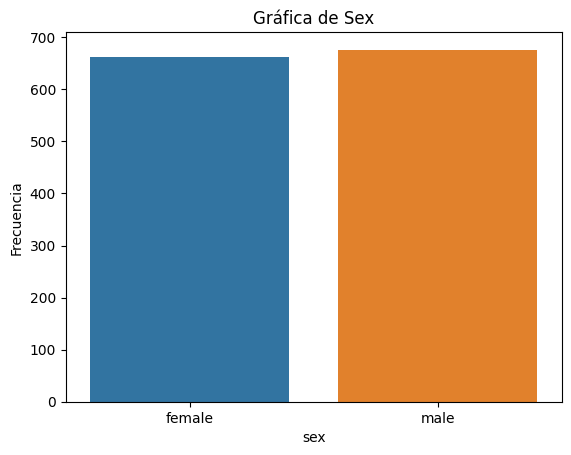

<ipython-input-9-c2c74a6929f4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=insurance_df[column], palette='tab10')


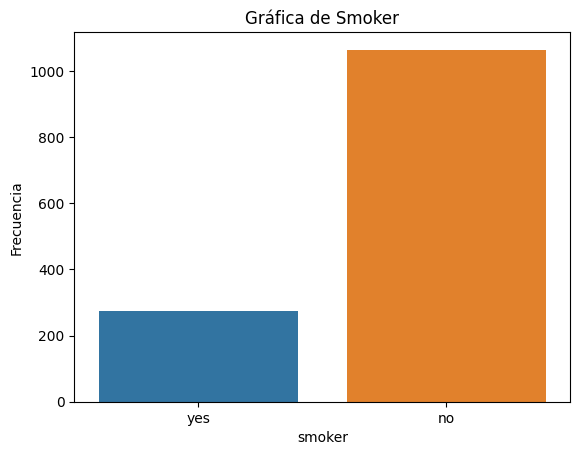

<ipython-input-9-c2c74a6929f4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=insurance_df[column], palette='tab10')


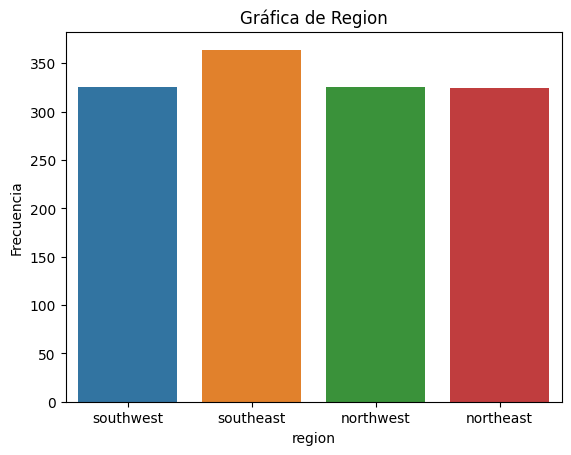

In [9]:
columns = insurance_df.describe(include='object')

for column in columns:
    sns.countplot(x=insurance_df[column], palette='tab10')
    plt.title(f'Gráfica de {column.capitalize()}')
    plt.xlabel(column)
    plt.ylabel("Frecuencia")
    plt.show()

Para responder los siguientes cuestionamientos, genera los gráficos indicados:

2a) ¿Hay diferencias significativas de las primas según el sexo? Compara la distribución de la variable `charges` por medio de un boxplot.

<ipython-input-235-de19a2fcf92b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(y='charges', x='sex', data=insurance_df, palette='tab10')


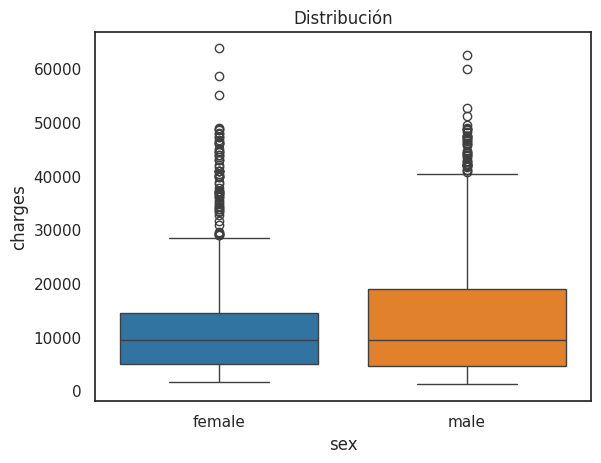

In [ ]:
ax = sns.boxplot(y='charges', x='sex', data=insurance_df, palette='tab10')
ax.set_title("Distribución")
ax.set_ylabel('charges')
ax.set_xlabel("sex")
plt.show()

***La diferencia significativas en female y male es la cantidad de valores atípicos de cada conjunto en la variable sex, con este gráfico podemos ver la muestra de la distribución cuantitativa de los datos de  a través de los niveles categóricos de las variables.***

2b) Crea un diagrama de dispersión de `charges` versus el `bmi` que incorpore la distinción por las categorías `smoker` y `children` (tip: utiliza el parámetro `size`) ¿Hay alguna conclusión importante que se derive del gráfico?

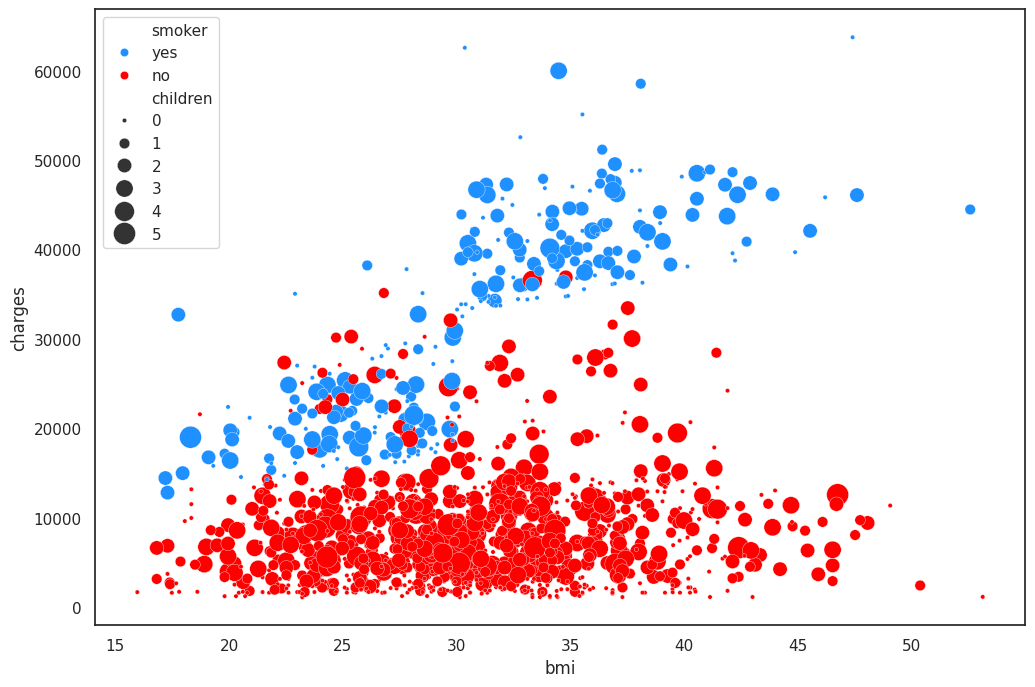

In [ ]:
#diagrama de dispersión
plt.figure(figsize=(12, 8))
sns.scatterplot(data=insurance_df, x="bmi", y="charges", hue="smoker", size="children", sizes=(10,250),palette=['dodgerblue','red'])
plt.show()

***La dispersión de los no fumadores es mayor a los que si son fumadores con el párametro size podemos visualizar la cantidad de datos de los fumadores según el bmi.El resultado del análisis en el diagrama puede mostrar que existe una relación entre una variable y la otra.***

2c) Elabora un mapa de calor que muestre la correlación de las variables numéricas.

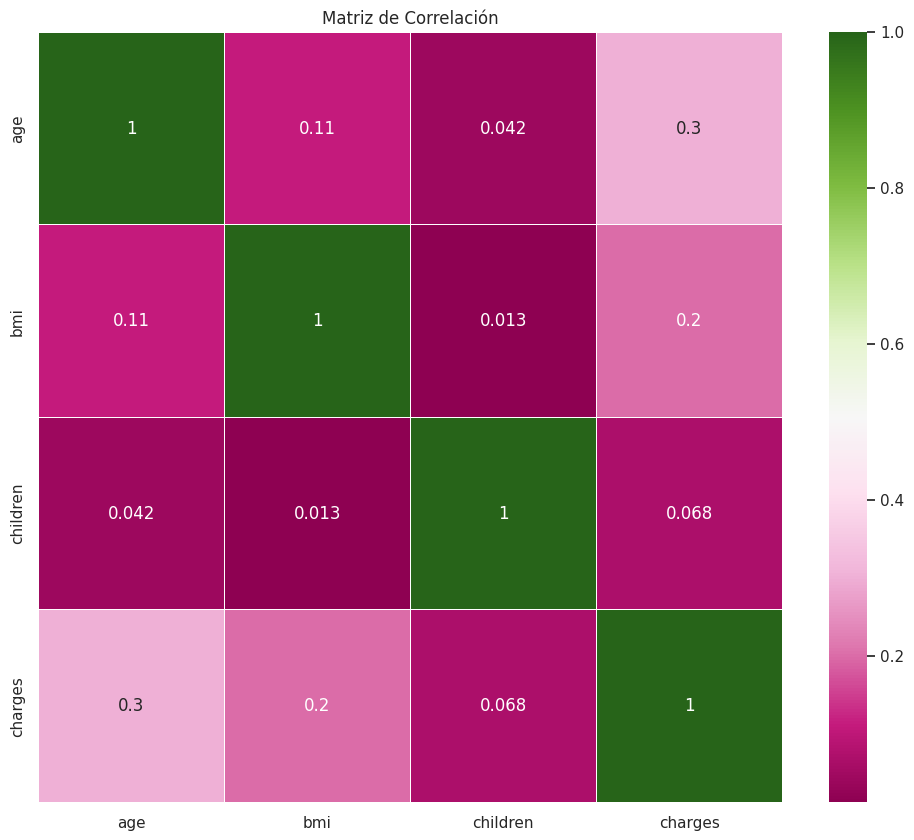

In [10]:
# Seleccionar solo las columnas numéricas
columns = insurance_df.select_dtypes(include=np.number)

# Calcular la matriz de correlación para las variables numéricas
correlacion = columns.corr()

# Configurar el estilo de Seaborn
sns.set(style="white")

# Crear el heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlacion, annot=True, cmap='PiYG', linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

Obtén un dataframe con las observaciones que tengan valores atípicos en `charges`.

3a) ¿Cuál es el promedio de `age` y de `bmi`?

***valores atípicos en charges***

In [11]:
#cuantiles para los valores atípicos en charges
q1= insurance_df['charges'].quantile(0.25)
q3 = insurance_df['charges'].quantile(0.75)

#obtenemos el IQR
iqr = q3 - q1

#limites inferior y superior
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

#outliers
outliers = insurance_df[(insurance_df['charges'] < lower) | (insurance_df['charges'] > upper)]
print(f"cantidad de outliers en charges:{len(outliers)}")
outliers

cantidad de outliers en charges:139


,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


***promedio de age y bmi***

In [12]:
#promedios
pro_age=insurance_df['age'].mean().round(2)
pro_bmi=insurance_df['bmi'].mean().round(2)
#impresión
print("Promedio de la variable age:", pro_age, "%")
print("Promedio de la varible bmi:", pro_bmi, "%")

Promedio de la variable age: 39.21 %
Promedio de la varible bmi: 30.66 %


3b) ¿Qué porcentaje de estas observaciones se corresponden a mujeres y a hombres? ¿A fumadores y no fumadores?

In [13]:
# Identificación de outliers según variable
columns_sex = outliers['sex'].value_counts()
columns_smoker = outliers['smoker'].value_counts()
total = len(outliers)

# Porcentajes de cada categoria dentro de la variable categórica
f = (columns_sex['male'] / total * 100).round(2)
m = (columns_sex['female'] / total * 100).round(2)
no = (columns_smoker['no'] / total * 100).round(2)
yes = (columns_smoker['yes'] / total * 100).round(2)

print(f"valores atipicos en female: {f:.2f}%")
print(f"valores atipicos en male: {m:.2f}%")
print(f"valores atipicos en los fumadores: {yes:.2f}%")
print(f"valores atipicos en los no fumadores: {no:.2f}%")

valores atipicos en female: 64.03%
valores atipicos en male: 35.97%
valores atipicos en los fumadores: 97.84%
valores atipicos en los no fumadores: 2.16%


# **Parte 2**. Preprocesamiento

4. Separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`charges`).

In [14]:
#predictores
x = insurance_df.drop('charges', axis = 1)
#variable de salida
y = insurance_df['charges']

5. Divide el conjunto en entrenamiento y prueba (80:20) considerando:


*   El parámetro `random_state` con el valor de 1 para garantizar reproducibilidad.
*   Analiza los diagramas de barras obtenidos en el ejercicio 1c. Con los resultados observados, es conveniente usar la variable `smoker` en la estrategia de estratificación.
*   Como ya tienes separadas en `X` e `y` los predictores y salida, consulta cómo ejecutar la función `train_test_split()` para obtener `Xtrain, Xtest, ytrain, ytest` en una única instrucción.

In [15]:
from sklearn.model_selection import train_test_split
#estratificacion de smoker con las variables de train_test_split()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=x['smoker'], random_state=1)

In [16]:
print(f"Conjuntos de enetrenamiento:", x_train.shape, y_train.shape)
print(f"Conjuntos de prueba:", x_test.shape, y_test.shape)

Conjuntos de enetrenamiento: (1070, 6) (1070,)
Conjuntos de prueba: (268, 6) (268,)


6. Prepara un transformador, denominado `preprocessing`, para aplicar escalamiento *MinMax* a los predictores numéricos y codificación *one-hot* a los categóricas.

In [19]:
#librerias para el transformador categorico y numerico
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

#se estandarizan las columnas numéricas y se hace one-hot-encoding de las variables categoricas
variables_numericas = x_train.select_dtypes(include=['float64', 'int']).columns.to_list()
variables_categoricas = x_train.select_dtypes(include=['object', 'category']).columns.to_list()

preprocessing = ColumnTransformer(
    transformers=[
        ('variables_numericas', MinMaxScaler(), variables_numericas),
        ('onehot', OneHotEncoder(drop='first'), variables_categoricas)
    ])

In [20]:
x_train_prep = preprocessing.fit_transform(x_train)
x_test_prep  = preprocessing.transform(x_test)

In [21]:
#converti el output en dataframe y añadir el nombre de las columnas
categoricas = preprocessing.named_transformers_['onehot'].get_feature_names_out(variables_categoricas)
nombre_columnas = np.concatenate([variables_numericas, categoricas])
x_train_prep = preprocessing.transform(x_train)
x_train_prep = pd.DataFrame(x_train_prep, columns=nombre_columnas)
x_train_prep.head(3)

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0.500000,0.136720,0.2,1.0,0.0,0.0,1.0,0.0
1,0.108696,0.924274,0.2,1.0,0.0,0.0,1.0,0.0
2,0.239130,0.253752,0.0,0.0,0.0,1.0,0.0,0.0


# **Parte 3**. Entrenando y evaluando el modelo de RL

7. Ejecuta un pipeline con el transformador creado y el algoritmo de regresión lineal para entrenar un modelo denominado `lr_model`.

Evalúa el modelo en el conjunto de prueba y obtén la raíz del error cuadrático medio (`RMSE`) y la métrica `R` cuadrado ($R^2$). Aunque ésta última la estudiarás a detalle la próxima semana, ahora sólo debes saber que toma valores entre 0 y 1, donde 1 indica un ajuste perfecto y, por tanto, un modelo muy fiable para las previsiones futuras. La función de scikit-learn que determina esta métrica es: [`r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

In [22]:
#importando librerias
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#lr_model para pipeline
lr_model=Pipeline([
    ('preprocessing', preprocessing),
    ('regression', LinearRegression())
])
#variables a entrenar para el pipeline
lr_model.fit(x_train, y_train)
#predicciones para conjunto de pruebas
y_test_predict = lr_model.predict(x_test)
#calculo del error cuadratico medio
print("RMSE score: {:.2f}".format(np.sqrt(mean_squared_error(y_test, y_test_predict))))
#calculo para la metrica r2
print("R^2 score: {:.2f}".format(r2_score(y_test, y_test_predict)))

RMSE score: 5698.76
R^2 score: 0.75


**Valora el rendimiento del modelo con los siguientes cambios:**


8. Reemplaza los outliers de `charges` con el límite superior (`Q3 + 1.5 * IQR`). Haz el cambio en ambos conjuntos: `ytrain` y `ytest`, previo a la aplicación del mismo pipeline. Guarda el modelo como `lr_model2`.


In [23]:
#reemplazar los outliers de charges con el límite superior (Q3 + 1.5 * IQR)
upper_2 = q3  + 1.5 * iqr

#outliers en y_train
y_train_sin_outliers = y_train
y_train_sin_outliers[y_train_sin_outliers > upper_2] = upper_2

#outliers en y_test
y_test_sin_outliers = y_test
y_test_sin_outliers[y_test_sin_outliers > upper_2] = upper_2

In [24]:
#lr_model2 para pipeline
lr_model2=Pipeline([
    ('preprocessing', preprocessing),
    ('regression', LinearRegression())
])
#variables a entrenar para el pipeline
lr_model2.fit(x_train, y_train_sin_outliers)
#predicciones para conjunto de pruebas
y_test_predict2 = lr_model2.predict(x_test)
#calculo del error cuadratico medio
print("RMSE score: {:.2f}".format(np.sqrt(mean_squared_error(y_test_sin_outliers, y_test_predict2))))
#calculo para la metrica r2
print("R^2 score: {:.2f}".format(r2_score(y_test_sin_outliers, y_test_predict2)))

RMSE score: 4812.06
R^2 score: 0.76


9. Prepara otro transformador, denominado `preprocessing2`, para aplicar escalamiento estándar a los predictores numéricos y codificación ordinal a los categóricas. Aplícalo en un nuevo pipeline utilizando nuevamente regresión lineal. Guarda el modelo como `lr_model3`.

**Nota.** Los cambios se ejecutan de manera consecutiva, por ejemplo: el reemplazo de los outliers también se ejecuta previo al transformador `preprocessing2` y así sucesivamente.

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Crear un nuevo transformador (preprocessing2) con escalamiento estándar para variables numéricas y codificación ordinal para categóricas
variables_numericas = x_train.select_dtypes(include=['float64', 'int']).columns.to_list()
variables_categoricas = x_train.select_dtypes(include=['object', 'category']).columns.to_list()

preprocessing_2 = ColumnTransformer(
    transformers=[
        ('variables numericas', StandardScaler(), variables_numericas),
        ('variables categoricas', OrdinalEncoder(), variables_categoricas)
    ])

In [26]:
#crear un nuevo pipeline (lr_model3) con el transformador preprocessing_2 y el modelo de regresión lineal
lr_model3 = Pipeline([
    ('preprocessing_2', preprocessing_2),
    ('regression', LinearRegression())
])

#entrenar el modelo con el conjunto de entrenamiento sin outliers y con el nuevo transformador
lr_model3.fit(x_train, y_train_sin_outliers)

#realizar predicciones en el conjunto de prueba sin outliers y con el nuevo transformador
y_pred_sin_outliers_3 = lr_model3.predict(x_test)

#calcular RMSE y R cuadrado sin outliers y con el nuevo transformador
rmse_sin_outliers_lr_model3 = np.sqrt(mean_squared_error(y_test_sin_outliers, y_pred_sin_outliers_3))
r2_sin_outliers_lr_model3 = r2_score(y_test_sin_outliers, y_pred_sin_outliers_3)

# Mostrar los resultados
print(f"RMSE sin outliers preprocessing_2: {rmse_sin_outliers_lr_model3:.2f}")
print(f"R^2  sin outliers preprocessing_2: {r2_sin_outliers_lr_model3:.2f}")

RMSE sin outliers preprocessing_2: 4811.60
R^2  sin outliers preprocessing_2: 0.76


10. Utiliza regresión polinomial para verificar si se produce un mejor ajuste. Intenta con varios grados, aunque debes dejar en el código sólo el de mejor rendimiento. Guarda el modelo como `lr_model4`.

In [27]:
resultado = None
grados = np.arange(1, 10)
min_rmse = float('inf')

for grado in grados:

    poly_reg_model = Pipeline([
        ('preprocessing_2', preprocessing_2),
        ('polynomial', PolynomialFeatures(degree=grado)),
        ('regression', LinearRegression())
    ])
    poly_reg_model.fit(x_train, y_train_sin_outliers)
    poly_reg_y_predicted = poly_reg_model.predict(x_test)
    #calculo del rmse sin outliers
    poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))

    #validación de grado
    if min_rmse > poly_reg_rmse:
        min_rmse = poly_reg_rmse
        resultado = grado
# Plot and present results
print("El mejor grado polynominal es :", resultado)

El mejor grado polynominal es : 2


In [28]:
#modelo para guardar el mejor grado polynominal
lr_model4 = Pipeline([
    ('preprocessing2', preprocessing_2),
    ('polynomial', PolynomialFeatures(degree=resultado)),
    ('regression', LinearRegression())
])
#entrenar el modelo con el conjunto de entrenamiento sin outliers y con el nuevo transformador
lr_model4.fit(x_train, y_train_sin_outliers)
#realizar predicciones en el conjunto de prueba sin outliers y con el nuevo transformador
y_pred_sin_outliers_4 = lr_model4.predict(x_test)
#calcular RMSE y R cuadrado sin outliers y con el nuevo transformador
rmse_sin_outliers_lr_model4 = np.sqrt(mean_squared_error(y_test_sin_outliers, y_pred_sin_outliers_4))
r2_sin_outliers_lr_model4 = r2_score(y_test_sin_outliers, y_pred_sin_outliers_4)
# Mostrar los resultados
print(f"RMSE: {rmse_sin_outliers_lr_model4:.2f}")
print(f"R^2: {r2_sin_outliers_lr_model4:.2f}")

RMSE: 4285.57
R^2: 0.81
